<a href="https://colab.research.google.com/github/LinkHK/FirstGitHub/blob/master/%E7%BB%83%E4%B9%A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

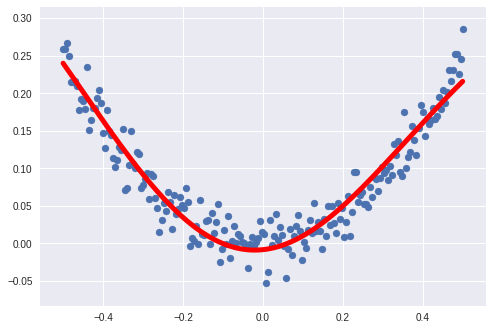

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# 使用numpy生成200个随机点
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data)+noise

# 定义两个placeholder
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1)+biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2)+biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
# 使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        sess.run(train_step, feed_dict={x: x_data, y: y_data})

    # 获得预测值
    prediction_value = sess.run(prediction, feed_dict={x: x_data})
    # 画图
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# 载入数据集
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# 每个批次的大小
batch_size = 100
# 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size

# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

#创建一个简单的神经网络
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

# 二次代价函数
# loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))# 交叉熵
# 使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

# 结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
# 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
   
        acc = sess.run(accuracy, feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print("Iter"+str(epoch)+",Testing Accuracy"+str(acc))  

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Iter0,Testing Accuracy0.8246
Iter1,Testing Accuracy0.8946
Iter2,Testing Accuracy0.9012
Iter3,Testing Accuracy0.9065
Iter4,Testing Accuracy0.9081
Iter5,Testing Accuracy0.9097
Iter6,Testing Accuracy0.912
Iter7,Testing Accuracy0.9135
Iter8,Testing Accuracy0.9146
Iter9,Testing Accuracy0.916
Iter10,Testing Accuracy0.917
Iter11,Testing Accuracy0.9178
Iter12,Testing Accuracy0.918
Iter13,Testing Accuracy0.9189
Iter14,Testing Accuracy0.919
Iter15,Testing Accuracy0.9196
Iter16,Testing Accuracy0.9195
Iter17,Testing Accuracy0.9208
Iter18,Testing Accuracy0.9207
Iter19,Testing Accuracy0.9207
Iter20,Testing Accuracy0.9217


In [5]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# 载入数据集
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# 每个批次的大小
batch_size = 100
# 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size

# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

#创建一个简单的神经网络
W1 = tf.Variable(tf.truncated_normal([784,2000], stddev=0.1))
b1 = tf.Variable(tf.zeros([2000])+0.1)
L1 = tf.nn.tanh(tf.matmul(x,W1)+b1)
L1_drop = tf.nn.dropout(L1,keep_prob)

W2 = tf.Variable(tf.truncated_normal([2000,2000], stddev=0.1))
b2 = tf.Variable(tf.zeros([2000])+0.1)
L2 = tf.nn.tanh(tf.matmul(L1_drop,W2)+b2)
L2_drop = tf.nn.dropout(L2,keep_prob)

W3 = tf.Variable(tf.truncated_normal([2000,1000], stddev=0.1))
b3 = tf.Variable(tf.zeros([1000])+0.1)
L3 = tf.nn.tanh(tf.matmul(L2_drop,W3)+b3)
L3_drop = tf.nn.dropout(L3,keep_prob)

W4 = tf.Variable(tf.truncated_normal([1000,10],stddev=0.1))
b4 = tf.Variable(tf.zeros([10])+0.1)
prediction = tf.nn.softmax(tf.matmul(L3_drop,W4)+b4)

# 二次代价函数
# loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
# 使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

# 结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
# 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(31):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:1.0})
   
        test_acc = sess.run(accuracy, feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
        train_acc = sess.run(accuracy, feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
        print("Iter"+str(epoch)+",Testing Accuracy "+str(test_acc)+"Training Accurary "+str(train_acc))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Iter0,Testing Accuracy 0.9414Training Accurary 0.95454544
Iter1,Testing Accuracy 0.9571Training Accurary 0.97523636
Iter2,Testing Accuracy 0.9628Training Accurary 0.9825091
Iter3,Testing Accuracy 0.9652Training Accurary 0.9859273
Iter4,Testing Accuracy 0.9683Training Accurary 0.98792726
Iter5,Testing Accuracy 0.9684Training Accurary 0.9892909
Iter6,Testing Accuracy 0.9702Training Accurary 0.99038184
Iter7,Testing Accuracy 0.9699Training Accurary 0.9910182
Iter8,Testing Accuracy 0.9706Training Accurary 0.99161816
Iter9,Testing Accuracy 0.9699Training Accurary 0.99203634
Iter10,Testing Accuracy 0.9722Training 